# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set()

# Méthodes

In [2]:
def convert_false_to_nan(df):
    result = pd.DataFrame()
    
    # test sur dataset en input
    if len(df) == 0:
        print("Le DataFrame d'origine est vide.")
        return result
    
    for col in df.columns:
        temp_miss = df[df[col].isin([False])]
        if len(temp_miss) > 0:
            print("Dans la colonne", col, ", il y a", len(temp_miss), "valeurs à False. Nous les passons à NaN pour les traiter plus facilement.")
            df.loc[df[col]==False, col] = np.nan
    
    result = df
    return result

In [3]:
def filter_col_by_mising_data_pct(df, pct_min=0, pct_max=100):
    result = pd.DataFrame()
    print("Le DataFrame à filtrer présente", len(df), "lignes et", len(df.columns), "colonnes.")
    
    # test sur dataset en input
    if len(df) == 0:
        print("Le DataFrame d'origine est vide.")
        return result
    
    print("La méthode va renvoyer un DataFrame présentant uniquement les colonnes ayant une part de valeurs manquantes allant de", pct_min, "% inclu à", pct_max, "% exclu.")
    # extraction des colonnes remplissant la condition de filtrage
    tot_list_col = round(df.isnull().mean()*100, 4).sort_values(ascending=False)
    tot_list_col = pd.DataFrame(tot_list_col, columns = ["%"])
    remain_list_col = tot_list_col.loc[(tot_list_col["%"] >= pct_min) & (tot_list_col["%"] < pct_max), :]
    nb_col_remained = len(remain_list_col)
    nb_col_removed = len(tot_list_col) - nb_col_remained
    print("Après filtrage, il reste", nb_col_remained, "colonnes dans le DataFrame.")
    print("Il y a eu suppression de", nb_col_removed, "colonnes, soit", round(nb_col_removed/len(tot_list_col)*100, 2), "% des colonnes.")
    
    # test sur le nb de colonnes restantes
    if len(remain_list_col) == 0:
        print("Le filtre est trop bas. Il n'y a plus de colonnes à exploiter.")
        return result
    
    # renvoyer le même dataset avec uniquement les colonnes filtrées
    result = df[remain_list_col.index]
    return result

In [4]:
def remove_empty_columns(df):
    result = pd.DataFrame()
    
    # test sur dataset en input
    if len(df) == 0:
        print("Le DataFrame d'origine est vide.")
        return result
    
    print("Appel de la méthode filter_col_by_mising_data_pct() pour supprimer les colonnes vides.")
    result = filter_col_by_mising_data_pct(df)
    return result    

In [5]:
def split_data_num_categ(df):
    result = []
    
    # test sur dataset en input
    if len(df) == 0:
        print("Le DataFrame d'origine est vide.")
        return result
    
    dict_col = {
        'numeric': [],
        'category': [],
        'boolean': [],
        'datetime': [],
        'deltatime': []
    }
    
    for col in df.columns:
        if df[col].dtype.name in ('float64', 'int64'):
            dict_col['numeric'].append(col)
        elif df[col].dtype.name in ('object', 'category'):
            dict_col['category'].append(col)
        elif df[col].dtype.name == 'bool':
            dict_col['boolean'].append(col)
        elif df[col].dtype.name == 'datetime64':
            dict_col['datetime'].append(col)
        elif df[col].dtype.name == 'timedelta[ns]':
            dict_col['deltatime'].append(col)
        else:
            print("Type de données non connu :", df[col].dtype.name, "pour la colonne", col)

    print("Voici la répartition des colonnes par type de données :")
    for key, value in dict_col.items():
        nb_col_by_type = len(value)
        print(key, ":", nb_col_by_type, "colonnes.")
        if nb_col_by_type > 0:
            result.append(df[value])
    
    return result

In [6]:
# pour afficher les pourcentages et les libellés pour les parts > 5%
limit_perc = 5
def show_perc(pct):
    return ('%.1f%%' % pct) if pct > limit_perc else ''

def show_labels(data):
    list = []
    for val, cnt in data.items():
        if (cnt*100/np.sum(data)) > limit_perc :
            list.append(val)
        else:
            list.append('')
    return list

# Chargement du dataset

Il y avait un problème de données à cheval sur plusieurs lignes. Un script a permis de corriger le problème. Voici le fichier corrigé en entrée.

In [7]:
# Le séparateur dans le dataset est la tabulation
raw_data = pd.read_csv("fr.openfoodfacts.org.products_c1.csv", encoding='utf-8', sep='\t')

/tmp/ipykernel_7457/2650904854.py:2: DtypeWarning: Columns (0,19,20,24,25,26,28,35,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv("fr.openfoodfacts.org.products_c1.csv", encoding='utf-8', sep='\t')


In [8]:
print("Le dataset présente", raw_data.shape[0], "lignes et", raw_data.shape[1], "colonnes")

Le dataset présente 320749 lignes et 162 colonnes


In [9]:
# Les valeurs à False seront mise à NaN pour permettre le netoyage
# data_w_false = convert_false_to_nan(raw_data)
data_w_false = raw_data

Dans la colonne created_t , il y a 1 valeurs à False. Nous les passons à NaN pour les traiter plus facilement.
Dans la colonne additives_n , il y a 94259 valeurs à False. Nous les passons à NaN pour les traiter plus facilement.
Dans la colonne ingredients_from_palm_oil_n , il y a 244126 valeurs à False. Nous les passons à NaN pour les traiter plus facilement.
Dans la colonne ingredients_that_may_be_from_palm_oil_n , il y a 237264 valeurs à False. Nous les passons à NaN pour les traiter plus facilement.
Dans la colonne energy_100g , il y a 8909 valeurs à False. Nous les passons à NaN pour les traiter plus facilement.
Dans la colonne energy-from-fat_100g , il y a 164 valeurs à False. Nous les passons à NaN pour les traiter plus facilement.
Dans la colonne fat_100g , il y a 64504 valeurs à False. Nous les passons à NaN pour les traiter plus facilement.
Dans la colonne saturated-fat_100g , il y a 68736 valeurs à False. Nous les passons à NaN pour les traiter plus facilement.
Dans la colonn

<AxesSubplot:>

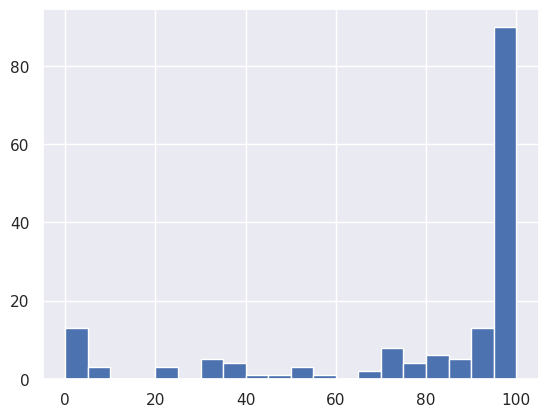

In [10]:
valeurs_manquantes = round(data_w_false.isnull().mean()*100, 4).sort_values(ascending=False)
missing_val_df = pd.DataFrame(valeurs_manquantes, columns = ["%"])
missing_val_df["%"].hist(bins=20)

In [11]:
miss_val_90 = missing_val_df.loc[missing_val_df["%"]>=90, :]
print("Les colonnes ayant plus de 90% de valeurs manquantes sont au nombre de", len(miss_val_90), "soit,", round(len(miss_val_90)/raw_data.shape[1]*100, 2), "% des colonnes.")

Les colonnes ayant plus de 90% de valeurs manquantes sont au nombre de 103 soit, 63.58 % des colonnes.


<AxesSubplot:>

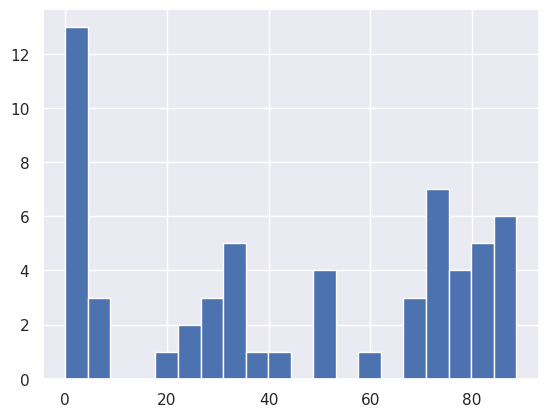

In [12]:
valeurs_manquantes = round(data_w_false.isnull().mean()*100, 4).sort_values(ascending=False)
missing_val_df = pd.DataFrame(valeurs_manquantes, columns = ["%"])
missing_val_df.loc[missing_val_df["%"]<90, "%"].hist(bins=20)

# Nettoyage

## Suppressions Lignes

In [13]:
# le nutriscore sera notre target, donc on peut supprimer toutes les lignes n'ayant pas de nutriscore renseigné
data_w_target = data_w_false.loc[data_w_false["nutrition-score-fr_100g"].notnull(), :]
print("Il y a", data_w_false.shape[0] - data_w_target.shape[0], "lignes sans nutri-score de renseigné, soit", round((1-data_w_target.shape[0]/data_w_false.shape[0])*100, 2), "% des données.")
data_w_target.reset_index(drop=True)

Il y a 112279 lignes sans nutri-score de renseigné, soit 35.01 % des données.


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1.489070e+09,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
1,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1.489056e+09,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
2,16124,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1.489056e+09,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN
3,16872,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1.489056e+09,2017-03-09T10:34:10Z,1489055651,2017-03-09T10:34:11Z,Zen Party Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,18227,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1.489056e+09,2017-03-09T10:34:42Z,1489055682,2017-03-09T10:34:42Z,Organic Oat Groats,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-6.0,-6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208465,9780803738782,http://world-fr.openfoodfacts.org/produit/9780...,usda-ndb-import,1.489070e+09,2017-03-09T14:32:24Z,1489069945,2017-03-09T14:32:25Z,Organic Z Bar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN
208466,9782211109758,http://world-fr.openfoodfacts.org/produit/9782...,kiliweb,1.489004e+09,2017-03-08T20:05:58Z,1489003558,2017-03-08T20:05:58Z,Verrine Cheescake Myrtille,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16.0,16.0,NaN,NaN
208467,9787461062105,http://world-fr.openfoodfacts.org/produit/9787...,usda-ndb-import,1.489092e+09,2017-03-09T20:45:00Z,1489092300,2017-03-09T20:45:00Z,Natural Cassava,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN
208468,9847548283004,http://world-fr.openfoodfacts.org/produit/9847...,drmalabar,1.437818e+09,2015-07-25T09:47:06Z,1442237848,2015-09-14T13:37:28Z,Tartines craquantes bio au sarrasin,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,-4.0,NaN,NaN


## Suppressions colonnes

Les colonnes étant complètement vides ne seront pas utilisées dans notre étude. Nous allons donc les supprimer.

In [14]:
# on appelle la méthode permettant de supprimer les colonnes vides
data_filt_100p = remove_empty_columns(data_w_target)

Appel de la méthode filter_col_by_mising_data_pct() pour supprimer les colonnes vides.
Le DataFrame à filtrer présente 208470 lignes et 162 colonnes.
La méthode va renvoyer un DataFrame présentant uniquement les colonnes ayant une part de valeurs manquantes allant de 0 % inclu à 100 % exclu.
Après filtrage, il reste 134 colonnes dans le DataFrame.
Il y a eu suppression de 28 colonnes, soit 17.28 % des colonnes.


## Sélection des colonnes pertinentes métier

Après étude de la problématique métier, j'ai fait la liste des colonnes ayant une pertinence dans notre analyse.  
 - Identification : 
 - Target : pour le calcul de notre modèle
 - Obligatoire : ce sont les éléments qui sont obligatoirement sur les étiquettes des produits d'après les lois européennes
 - Possible : ce sont les éléments qui sont possiblement sur les étiquettes des produits d'après les lois européennes
 - Pertiente : ce sont les éléments que je trouve pertient pour notre étude
 - Vitamines : 
 - Sels minéraux : 

In [15]:
col_id = ['code', 'product_name', 'generic_name', 'nutrition_grade_fr', 'countries_fr', "pnns_groups_1", "pnns_groups_2"]
col_target = ['nutrition-score-fr_100g']
col_mandatory = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g']
col_possible = ['monounsaturated-fat_100g', 'polyunsaturated-fat_100g', "polyols_100g", "starch_100g", "fiber_100g"]
col_pertinents = ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'fruits-vegetables-nuts_100g']
col_vitamins = ['vitamin-a_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g',
                'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'vitamin-b12_100g', 'biotin_100g',
                 'pantothenic-acid_100g']
col_minerals = ['potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g',
                 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g', 'chromium_100g',
                 'molybdenum_100g', 'iodine_100g']
print("D'après les lois européennes, il y a", len(col_mandatory), "colonnes obligatoires sur une étiquette.")
print("Optionnellement, il y a", len(col_possible), "colonnes.")
print("Il y a", len(col_pertinents), "colonnes pertinentes selon moi.")
print("Il y a optionnellement", len(col_vitamins), "colonnes avec les vitamines.")
print("Et pour finir, il y a optionnellement", len(col_minerals), "colonnes avec les sels minéraux.")
col_to_keep = col_id + col_target + col_mandatory + col_possible + col_pertinents + col_vitamins + col_minerals
print("On va donc travailler exclusivement avec ces", len(col_to_keep), "colonnes, soit", round(len(col_to_keep)/len(raw_data.columns)*100, 2), "% des colonnes.")
data_col_keep = data_filt_100p[col_to_keep]
print("Après filtrage, il reste", len(data_col_keep.columns), "colonnes dans le DataFrame.")

D'après les lois européennes, il y a 7 colonnes obligatoires sur une étiquette.
Optionnellement, il y a 5 colonnes.
Il y a 4 colonnes pertinentes selon moi.
Il y a optionnellement 13 colonnes avec les vitamines.
Et pour finir, il y a optionnellement 14 colonnes avec les sels minéraux.
On va donc travailler exclusivement avec ces 51 colonnes, soit 31.48 % des colonnes.
Après filtrage, il reste 51 colonnes dans le DataFrame.


## Lignes dupliquées

In [16]:
# identification et suppressions des lignes dupliquées
nb_lignes_dupli = data_col_keep.duplicated().sum()
print("Il y a", nb_lignes_dupli, "lignes dupliquées dans ce dataset, soit", round(nb_lignes_dupli/len(raw_data)*100, 3), "% du dataset.")
data_dupli_drop = data_col_keep.drop_duplicates().reset_index(drop=True)
print("On a supprimé les lignes dupliquées. Il reste", len(data_dupli_drop), "lignes dans le dataset.")

Il y a 9 lignes dupliquées dans ce dataset, soit 0.003 % du dataset.
On a supprimé les lignes dupliquées. Il reste 208461 lignes dans le dataset.


## Séparation données numériques et catégoricielles

In [17]:
# On regare la répartition des colonnes en fonction de leur type
data_num, data_categ = split_data_num_categ(data_dupli_drop)

Voici la répartition des colonnes par type de données :
numeric : 44 colonnes.
category : 7 colonnes.
boolean : 0 colonnes.
datetime : 0 colonnes.
deltatime : 0 colonnes.


## Valeurs manquantes

In [18]:
# A partir de là, nos données auront une structure fixe
data = data_dupli_drop
print("Notre dataset d'étude présente", data.shape[0], "lignes et", data.shape[1], "colonnes")
print("Par rapport à notre dataset brut, on a supprimé", round((1-data.shape[0]/raw_data.shape[0])*100, 2), "% de lignes et", round((1-data.shape[1]/raw_data.shape[1])*100, 2), "% de colonnes.")
raw_data = ""

Notre dataset d'étude présente 208461 lignes et 51 colonnes
Par rapport à notre dataset brut, on a supprimé 35.01 % de lignes et 68.52 % de colonnes.


### Traitement données catégoricielles

In [19]:
miss_categ = round(data[data_categ.columns].isnull().mean()*100, 4).sort_values(ascending=False)
miss_categ_df = pd.DataFrame(miss_categ, columns = ["%"])
print(miss_categ_df)

                          %
generic_name        82.2888
pnns_groups_1       71.9300
pnns_groups_2       71.8844
product_name         1.2424
countries_fr         0.0249
code                 0.0000
nutrition_grade_fr   0.0000


In [20]:
# si pas de product name, prendre generic name
mask_gen_to_prod = (data["product_name"].isnull()) & (data["generic_name"].notnull())
data.loc[mask_gen_to_prod, "product_name"] = data["generic_name"]
# sinon, prendre code
mask_code_to_prod = (data["product_name"].isnull()) & (data["code"].notnull())
data.loc[mask_code_to_prod, "product_name"] = data["code"]

In [21]:
data.loc[data["countries_fr"].isnull(),"countries_fr"] = "Autre"

### Traitement données numériques

In [22]:
miss_num = round(data[data_num.columns].isnull().mean()*100, 4).sort_values(ascending=False)
miss_num_df = pd.DataFrame(miss_num, columns = ["%"])
print(miss_num_df)

                                               %
molybdenum_100g                          99.9976
chromium_100g                            99.9928
fluoride_100g                            99.9818
chloride_100g                            99.9770
iodine_100g                              99.9021
starch_100g                              99.8935
biotin_100g                              99.8786
polyols_100g                             99.8259
vitamin-k_100g                           99.6316
selenium_100g                            99.5779
manganese_100g                           99.5078
vitamin-e_100g                           99.4670
pantothenic-acid_100g                    99.2608
fruits-vegetables-nuts_100g              99.1596
copper_100g                              99.1188
zinc_100g                                98.4688
vitamin-b12_100g                         98.2539
ingredients_from_palm_oil_n              97.9862
vitamin-b9_100g                          97.7391
magnesium_100g      

On fait l'approximation de mettre toutes les valeurs numériques à 0 car si elles ne sont pas renseignées, c'est souvent parce qu'elles n'existent pas sur l'étiquette.

In [23]:
# toutes les valeurs numériques ont remplies à 0
for col in data_num.columns:
    data[col].fillna(0, inplace=True)

## Outliers

In [24]:
data[data_num.columns].describe()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,...,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g
count,208461.000000,208461.000000,208461.000000,208461.000000,208461.000000,208461.000000,208461.000000,208461.000000,208461.000000,208461.000000,...,208461.000000,208461.000000,208461.000000,208461.000000,208461.000000,2.084610e+05,208461.000000,2.084610e+05,2.084610e+05,2.084610e+05
mean,9.725699,1218.446325,12.796875,5.225986,31.457466,15.688917,7.895541,1.711861,0.672766,0.467739,...,0.001946,0.008724,0.000119,0.000054,0.000021,7.760751e-07,0.000017,1.462727e-07,1.089892e-09,3.317985e-07
std,9.031762,1036.774409,16.140181,7.807962,28.744305,21.597438,8.168582,141.494195,4.215374,2.954059,...,0.138413,1.646311,0.010742,0.039143,0.002444,1.600334e-04,0.007822,6.570761e-05,2.722315e-07,2.532172e-05
min,-15.000000,0.000000,0.000000,0.000000,0.000000,-17.860000,-3.570000,0.000000,0.000000,0.000000,...,-0.000260,0.000000,0.000000,-6.896552,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000,506.000000,0.100000,0.000000,5.000000,1.400000,2.100000,0.101600,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,11.000000,1248.000000,6.250000,2.000000,21.280000,5.600000,5.830000,0.680720,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,17.000000,1757.000000,21.280000,7.500000,57.580000,24.800000,11.000000,1.407160,0.000000,0.000000,...,0.001290,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
max,40.000000,231199.000000,714.290000,550.000000,209.380000,3520.000000,430.000000,64312.800000,557.140000,75.000000,...,50.000000,657.143000,4.000000,16.483516,0.700000,5.000000e-02,3.571429,3.000000e-02,1.040000e-04,5.000000e-03


On observe différents outliers.  
Concernant les valeurs négatives, seul le nutri-score peut avoir cette valeur. Pour toutes les autres, on remplace la valeur négative par zéro.  
Concernant les valeurs maximum, les taux pour 100 g ne devraient pas dépasser 100. C'est une certitude pour les composants de base. En revanche, pour les vitamines et les Sels minéraux, il est possible que l'unité de mesure soit le µg. Une valeur supérieur à 100 est donc envisageable. Nous les laisserons donc.

In [25]:
# toutes les valeurs négatives, sauf le nutriscore seront calées à 0
col_outliers_1 = col_mandatory + col_possible + col_pertinents + col_vitamins + col_minerals
nb_num_neg = 0
for col in col_outliers_1:
    temp_nb_num_neg = data.loc[data[col]<0, :]
    nb_num_neg += len(temp_nb_num_neg)
    data.loc[data[col]<0, col] = 0  
print("Toutes les valeurs négatives sont calées à 0. Elles représentent", nb_num_neg, "valeurs, soit", round(nb_num_neg/len(data)*100, 3), "% du dataset d'étude.")

# toutes les valeurs supérieures à 100, sauf les vitamines et minéraux (unités en µg parfois) et la valeur énergétique
nb_num_sup_cent_ok = 0
col_outliers_2 = col_mandatory[1:] + col_possible + col_pertinents
for col in col_outliers_2:
    temp_nb_num_sup_cent_ok = data.loc[data[col]>100, :]
    nb_num_sup_cent_ok += len(temp_nb_num_sup_cent_ok)
    data.loc[data[col]>100, col] = 100
print("Toutes les valeurs supérieures à 100 sont calées à 100 quand c'est sûr. Elles représentent", nb_num_sup_cent_ok, "valeurs, soit", round(nb_num_sup_cent_ok/len(data)*100, 2), "% du dataset d'étude.")

Toutes les valeurs négatives sont calées à 0. Elles représentent 10 valeurs, soit 0.005 % du dataset d'étude.
Toutes les valeurs supérieures à 100 sont calées à 100 quand c'est sûr. Elles représentent 82 valeurs, soit 0.04 % du dataset d'étude.


In [26]:
# outliers qu'on laissera ainsi à cause des différentes unités de mesure
nb_num_sup_cent_maybe = 0
col_outliers_3 = col_vitamins + col_minerals
for col in col_outliers_3:
    temp_nb_num_sup_cent_maybe = data.loc[data[col]>100, :]
    nb_num_sup_cent_maybe += len(temp_nb_num_sup_cent_maybe)
print("Il y a cependant, des valeurs supérieures à 100 qu'on laissera ainsi. Elles représentent", nb_num_sup_cent_maybe, "valeurs, soit", round(nb_num_sup_cent_maybe/len(data)*100, 3), "% du dataset d'étude.")    

Il y a cependant, des valeurs supérieures à 100 qu'on laissera ainsi. Elles représentent 16 valeurs, soit 0.008 % du dataset d'étude.


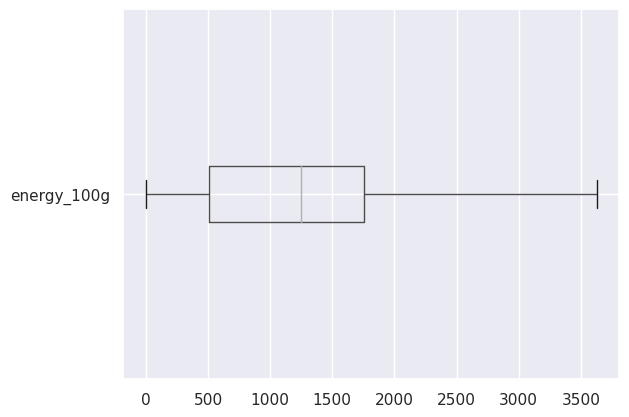

In [27]:
# autre outliers energy
data.boxplot(column="energy_100g", vert=False, showfliers=False)
plt.show()

In [28]:
# On cale les outliers max de l'énergie pour avoir quelque chose d'exploitable
quartiles = [np.nanpercentile(data["energy_100g"], p) for p in [25, 75]]
IQR = quartiles[1]-quartiles[0]
borne_max = 1.5*IQR+quartiles[1]
print("IQR : ", IQR)
print("borne max : ", borne_max)

max_possible = 3700
nb_energy_sup_max = len(data.loc[data["energy_100g"]>max_possible, :])
print("Nous modifions la valeur de l'énergie pour", nb_energy_sup_max, "lignes, soit", round(nb_energy_sup_max/len(data)*100, 2), "% du dataset d'étude.")    
data.loc[data["energy_100g"]>borne_max, "energy_100g"] = max_possible

IQR :  1251.0
borne max :  3633.5
Nous modifions la valeur de l'énergie pour 438 lignes, soit 0.21 % du dataset d'étude.


In [29]:
data[data_num.columns].describe()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,...,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g
count,208461.000000,208461.000000,208461.000000,208461.000000,208461.000000,208461.000000,208461.000000,208461.000000,208461.000000,208461.000000,...,208461.000000,208461.000000,208461.000000,208461.000000,208461.000000,2.084610e+05,208461.000000,2.084610e+05,2.084610e+05,2.084610e+05
mean,9.725699,1214.273396,12.792557,5.223300,31.456026,15.672400,7.893975,1.308071,0.670573,0.467739,...,0.001946,0.008724,0.000119,0.000087,0.000021,7.760751e-07,0.000017,1.462727e-07,1.089892e-09,3.317985e-07
std,9.031762,754.356865,16.048856,7.708801,28.738953,20.187105,8.118583,4.341282,4.041195,2.954059,...,0.138413,1.646311,0.010742,0.036111,0.002444,1.600334e-04,0.007822,6.570761e-05,2.722315e-07,2.532172e-05
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000,506.000000,0.100000,0.000000,5.000000,1.400000,2.100000,0.101600,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,11.000000,1248.000000,6.250000,2.000000,21.280000,5.600000,5.830000,0.680720,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,17.000000,1757.000000,21.280000,7.500000,57.580000,24.800000,11.000000,1.407160,0.000000,0.000000,...,0.001290,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
max,40.000000,3700.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,75.000000,...,50.000000,657.143000,4.000000,16.483516,0.700000,5.000000e-02,3.571429,3.000000e-02,1.040000e-04,5.000000e-03


# Analyse univariée

moyenne :  9.725699291474184
médiane :  11.0
mode :  0    1.0
Name: nutrition-score-fr_100g, dtype: float64
min :  -15.0
max :  40.0
quartiles :  [2.0, 17.0]
variance :  81.5723334877163
écart-type :  9.03174033548996
coefficient de variation :  0.9286468833564937
skewness :  0.0004100791463428458
kurtosis :  -0.9632443670980901


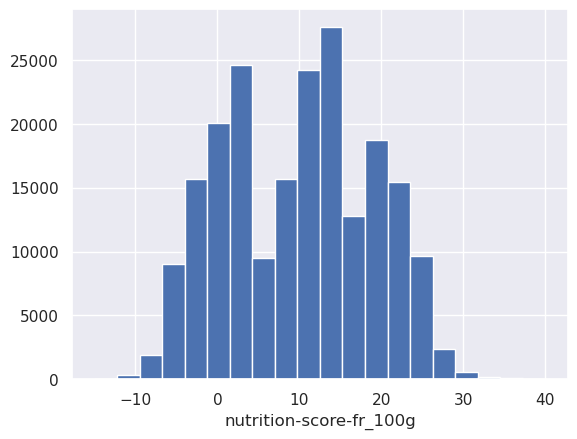

moyenne :  1214.2733962132031
médiane :  1248.0
mode :  0    2092.0
Name: energy_100g, dtype: float64
min :  0.0
max :  3700.0
quartiles :  [506.0, 1757.0]
variance :  569051.5500171278
écart-type :  754.355055671484
coefficient de variation :  0.621239877299456
skewness :  0.27004111529233193
kurtosis :  -0.5954803730767577


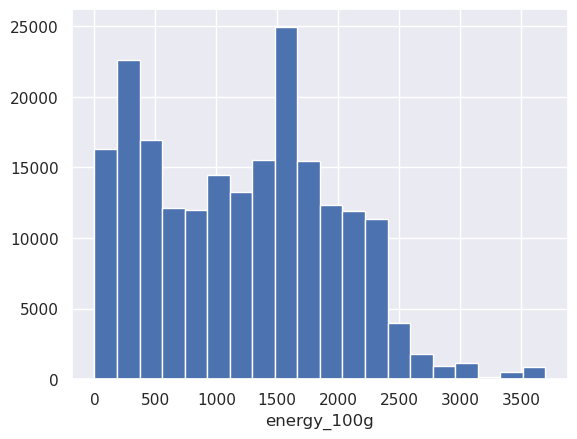

moyenne :  12.792556644649169
médiane :  6.25
mode :  0    0.0
Name: fat_100g, dtype: float64
min :  0.0
max :  100.0
quartiles :  [0.1, 21.28]
variance :  257.5645489213341
écart-type :  16.048817679858356
coefficient de variation :  1.254543413459983
skewness :  1.8558654101178118
kurtosis :  4.67305469229863


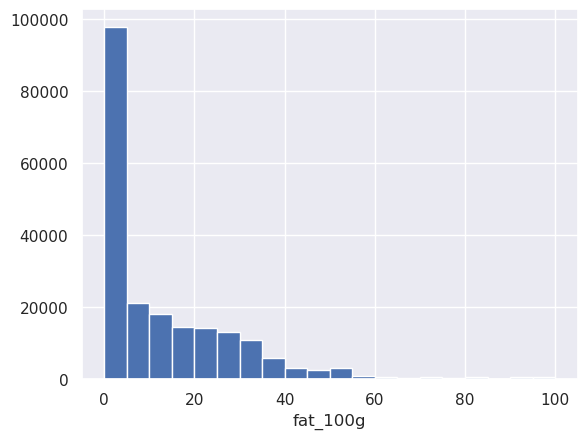

moyenne :  5.223299952173118
médiane :  2.0
mode :  0    0.0
Name: saturated-fat_100g, dtype: float64
min :  0.0
max :  100.0
quartiles :  [0.0, 7.5]
variance :  59.42532612674336
écart-type :  7.708782402347556
coefficient de variation :  1.4758452459044344
skewness :  3.1460718611178486
kurtosis :  18.8572166307394


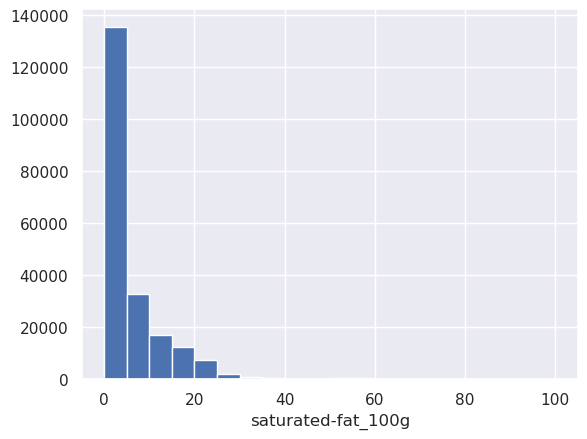

moyenne :  31.45602624519427
médiane :  21.28
mode :  0    0.0
Name: carbohydrates_100g, dtype: float64
min :  0.0
max :  100.0
quartiles :  [5.0, 57.58]
variance :  825.9234414670752
écart-type :  28.738883789511995
coefficient de variation :  0.9136209248268481
skewness :  0.5146477221958122
kurtosis :  -1.1389470038714529


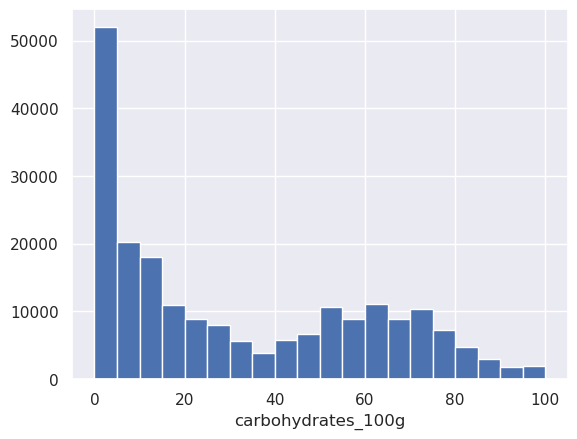

moyenne :  15.672400439316108
médiane :  5.6
mode :  0    0.0
Name: sugars_100g, dtype: float64
min :  0.0
max :  100.0
quartiles :  [1.4, 24.8]
variance :  407.5172427792654
écart-type :  20.187056317830628
coefficient de variation :  1.2880640968813533
skewness :  1.581022042648464
kurtosis :  1.9631962810684747


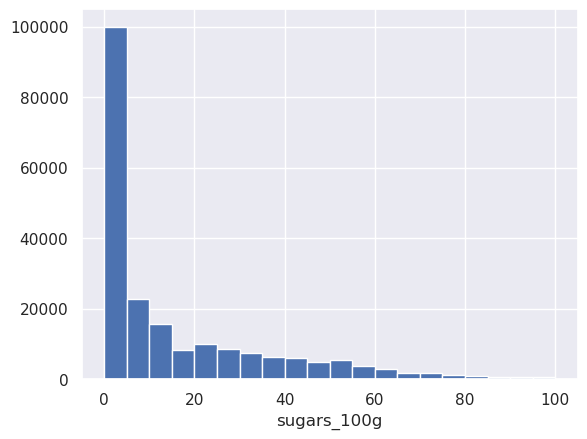

moyenne :  7.893974738680764
médiane :  5.83
mode :  0    0.0
Name: proteins_100g, dtype: float64
min :  0.0
max :  100.0
quartiles :  [2.1, 11.0]
variance :  65.91106738884004
écart-type :  8.118563135730364
coefficient de variation :  1.0284506100518802
skewness :  1.9932623304018582
kurtosis :  7.511229598788958


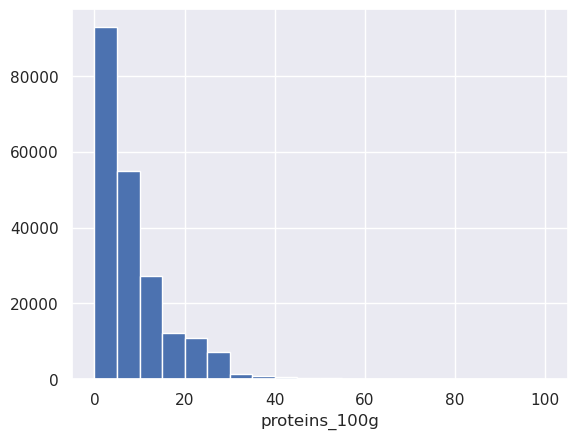

moyenne :  1.3080705115156113
médiane :  0.68072
mode :  0    0.0
Name: salt_100g, dtype: float64
min :  0.0
max :  100.0
quartiles :  [0.1016, 1.40716]
variance :  18.846636758549085
écart-type :  4.341271329754578
coefficient de variation :  3.318835866672442
skewness :  14.97881551975185
kurtosis :  278.16543208603736


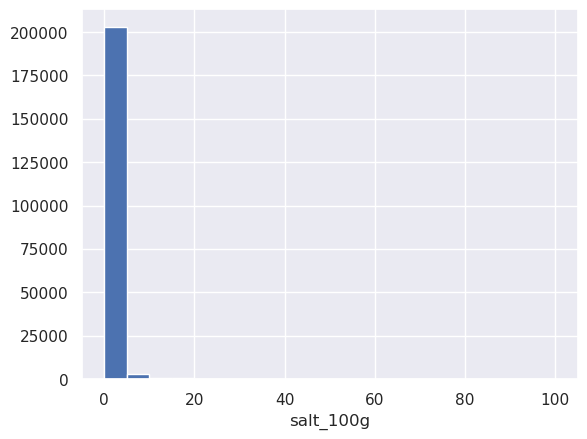

moyenne :  0.6705729009263118
médiane :  0.0
mode :  0    0.0
Name: monounsaturated-fat_100g, dtype: float64
min :  0.0
max :  100.0
quartiles :  [0.0, 0.0]
variance :  16.33117842311907
écart-type :  4.041185274535068
coefficient de variation :  6.026466725620258
skewness :  10.367533793163636
kurtosis :  140.90004396330357


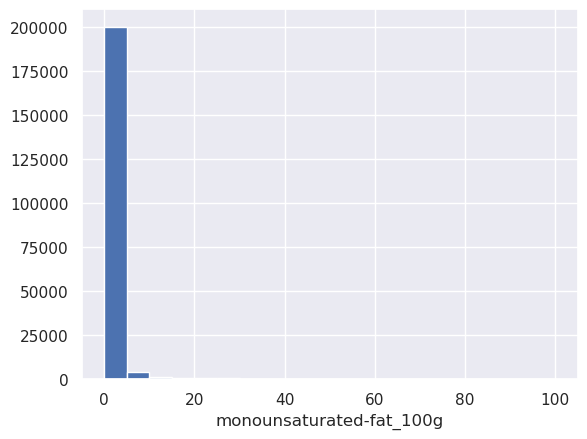

moyenne :  0.4677388854509993
médiane :  0.0
mode :  0    0.0
Name: polyunsaturated-fat_100g, dtype: float64
min :  0.0
max :  75.0
quartiles :  [0.0, 0.0]
variance :  8.72642111159168
écart-type :  2.954051643352174
coefficient de variation :  6.315599868297977
skewness :  11.231483885897722
kurtosis :  169.82936915447124


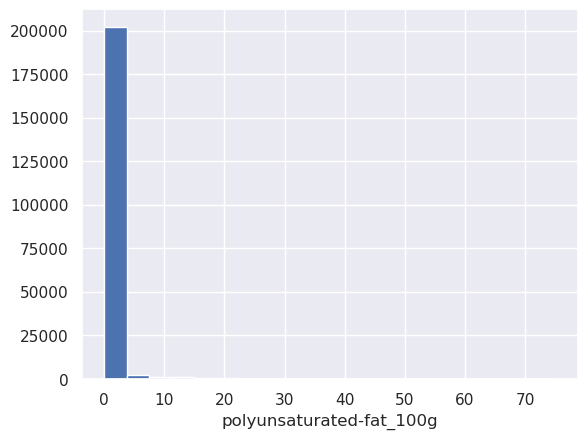

moyenne :  0.08992886439190059
médiane :  0.0
mode :  0    0.0
Name: polyols_100g, dtype: float64
min :  0.0
max :  100.0
quartiles :  [0.0, 0.0]
variance :  6.4650274913055
écart-type :  2.5426418330754923
coefficient de variation :  28.27392350908519
skewness :  31.613511593882738
kurtosis :  1056.0523136551437


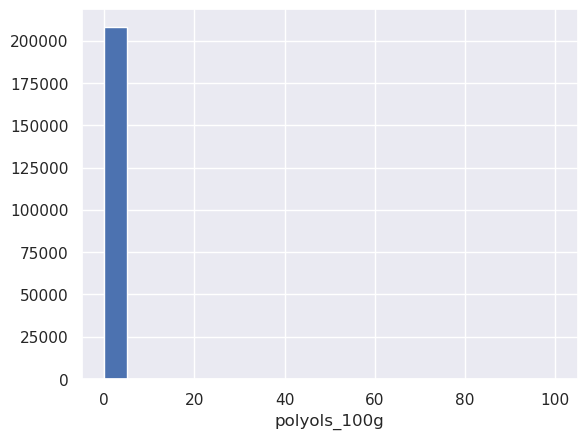

moyenne :  0.036184466159137674
médiane :  0.0
mode :  0    0.0
Name: starch_100g, dtype: float64
min :  0.0
max :  87.8
quartiles :  [0.0, 0.0]
variance :  1.797902961527148
écart-type :  1.3408590386491595
coefficient de variation :  37.05620618394979
skewness :  41.433596486837246
kurtosis :  1838.4861741594048


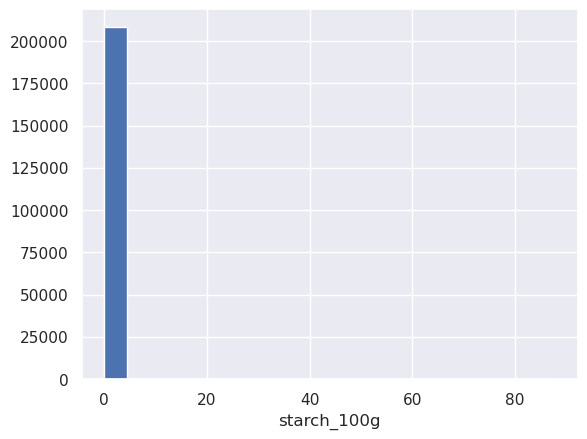

moyenne :  2.471590928087054
médiane :  0.9
mode :  0    0.0
Name: fiber_100g, dtype: float64
min :  0.0
max :  100.0
quartiles :  [0.0, 3.4]
variance :  18.68459483876877
écart-type :  4.322568083763259
coefficient de variation :  1.7489010963107932
skewness :  5.162580218117142
kurtosis :  53.492910388359824


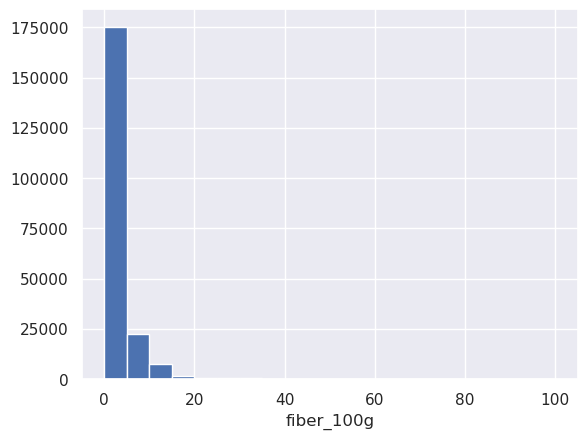

moyenne :  1.7860127313981993
médiane :  1.0
mode :  0    0.0
Name: additives_n, dtype: float64
min :  0.0
max :  31.0
quartiles :  [0.0, 3.0]
variance :  6.139817308384526
écart-type :  2.4778654742306987
coefficient de variation :  1.387372794532587
skewness :  2.3862251905206984
kurtosis :  8.838403722147245


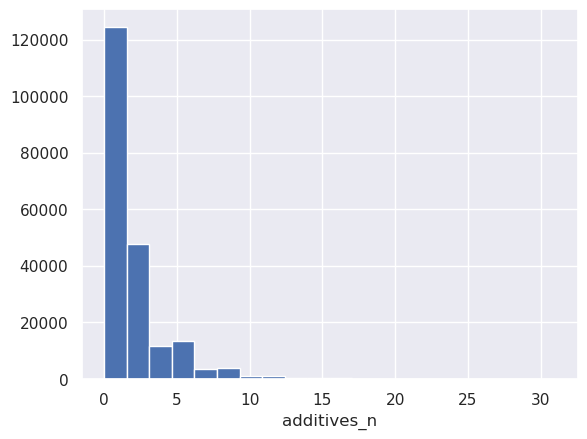

moyenne :  0.020377912415271923
médiane :  0.0
mode :  0    0.0
Name: ingredients_from_palm_oil_n, dtype: float64
min :  0.0
max :  2.0
quartiles :  [0.0, 0.0]
variance :  0.020442359136989816
écart-type :  0.14297677831378708
coefficient de variation :  7.01626228438568
skewness :  7.034049734828232
kurtosis :  49.668095669687155


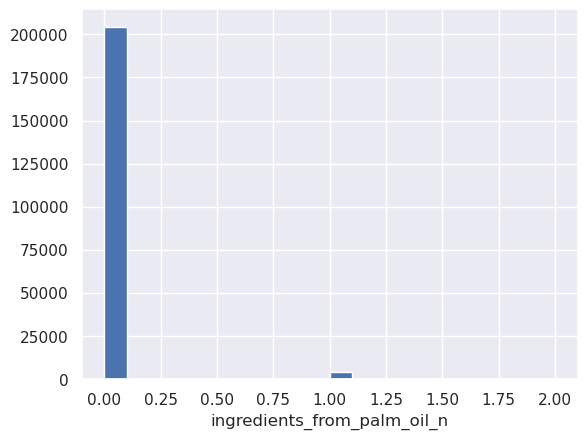

moyenne :  0.052287957939374755
médiane :  0.0
mode :  0    0.0
Name: ingredients_that_may_be_from_palm_oil_n, dtype: float64
min :  0.0
max :  6.0
quartiles :  [0.0, 0.0]
variance :  0.06958645146325466
écart-type :  0.2637924401177082
coefficient de variation :  5.044994115539226
skewness :  6.203668877024471
kurtosis :  48.76875677858734


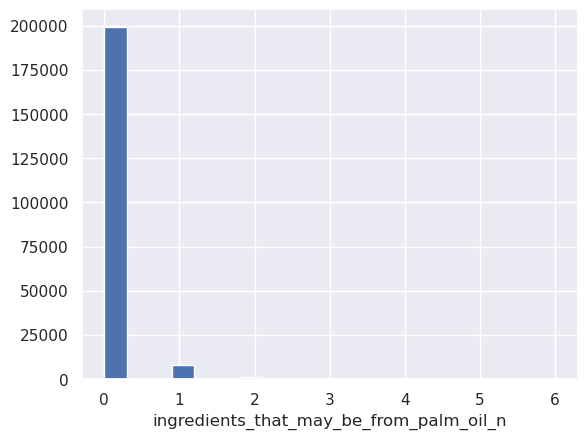

moyenne :  0.38873827718374176
médiane :  0.0
mode :  0    0.0
Name: fruits-vegetables-nuts_100g, dtype: float64
min :  0.0
max :  100.0
quartiles :  [0.0, 0.0]
variance :  25.095119343812982
écart-type :  5.009502903863115
coefficient de variation :  12.886569699683353
skewness :  14.982243305066646
kurtosis :  244.25828027380376


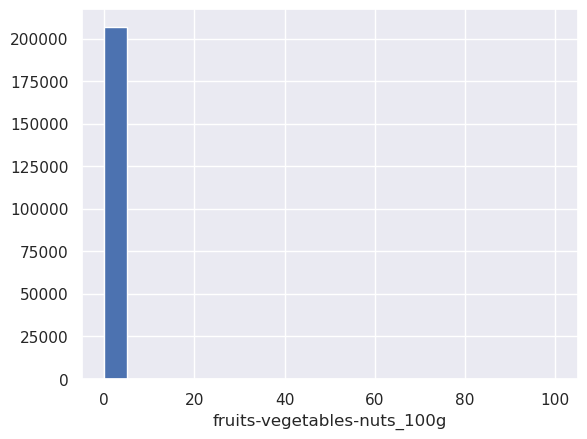

In [30]:
for col in col_target + col_mandatory + col_possible + col_pertinents :
    print("moyenne : ", data[col].mean())
    print("médiane : ", data[col].median())
    print("mode : ", data[col].mode())
    print("min : ", data[col].min())
    print("max : ", data[col].max())
    quartiles = [np.nanpercentile(data[col], p) for p in [25, 75]]
    print("quartiles : ", quartiles)
    # mesures de dispersion
    print("variance : ", data[col].var(ddof=0))
    print("écart-type : ", data[col].std(ddof=0))
    print("coefficient de variation : ", data[col].std(ddof=0)/data[col].mean())
    # mesures de forme
    print("skewness : ", data[col].skew())
    print("kurtosis : ", data[col].kurtosis())
    data[col].hist(bins=20)
    plt.xlabel(col)
    plt.show()

moyenne :  0.46
médiane :  0.46
mode :  0    0.12
1    0.80
Name: vitamin-a_100g, dtype: float64
min :  0.12
max :  0.8
quartiles :  [0.29000000000000004, 0.63]
variance :  0.11560000000000002
écart-type :  0.34
coefficient de variation :  0.7391304347826088
skewness :  nan
kurtosis :  nan


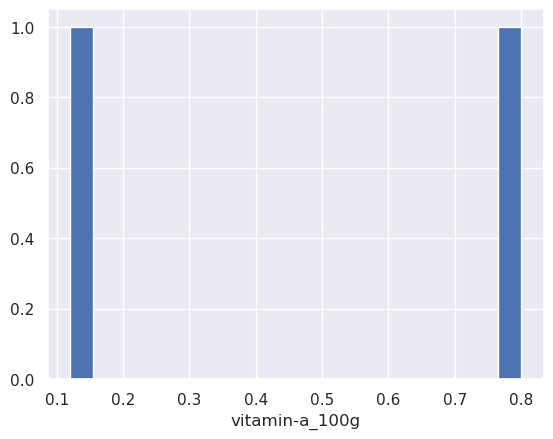

moyenne :  nan
médiane :  nan
mode :  Series([], Name: vitamin-d_100g, dtype: float64)
min :  nan
max :  nan
quartiles :  [nan, nan]
variance :  nan
écart-type :  nan
coefficient de variation :  nan
skewness :  nan
kurtosis :  nan


/home/slerendu/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


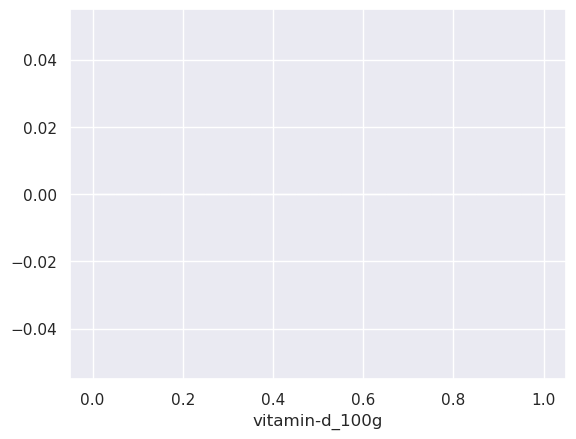

moyenne :  5.124083333333334
médiane :  3.0
mode :  0      0.125
1      0.137
2      0.343
3      0.730
4      1.054
5      2.400
6      3.600
7      4.500
8      9.800
9     11.000
10    12.700
11    15.100
Name: vitamin-e_100g, dtype: float64
min :  0.125
max :  15.1
quartiles :  [0.63325, 10.100000000000001]
variance :  27.669258243055552
écart-type :  5.260157625305116
coefficient de variation :  1.0265558311838114
skewness :  0.7882051569415087
kurtosis :  -1.0341058242022116


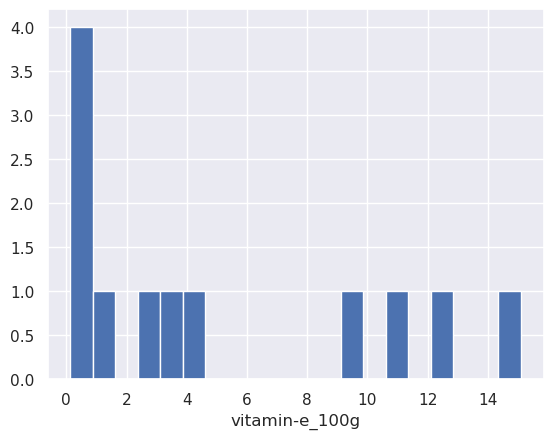

moyenne :  31.25
médiane :  31.25
mode :  0    31.25
Name: vitamin-k_100g, dtype: float64
min :  31.25
max :  31.25
quartiles :  [31.25, 31.25]
variance :  0.0
écart-type :  0.0
coefficient de variation :  0.0
skewness :  nan
kurtosis :  nan


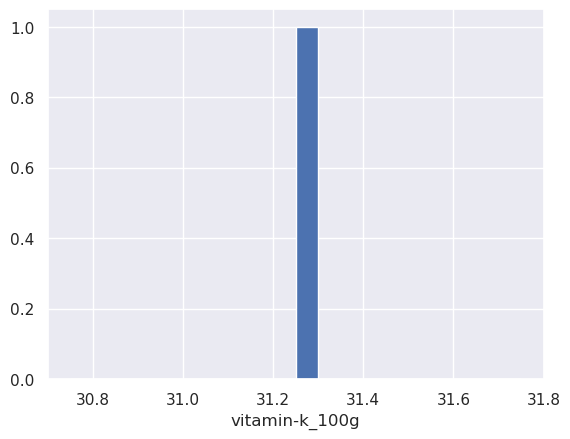

moyenne :  0.4173582317073184
médiane :  0.2
mode :  0    0.12
Name: vitamin-c_100g, dtype: float64
min :  0.1009
max :  152.9412
quartiles :  [0.1286, 0.2643]
variance :  20.774604204825618
écart-type :  4.557916651807668
coefficient de variation :  10.920873977164076
skewness :  32.750932460616355
kurtosis :  1094.3006960892628


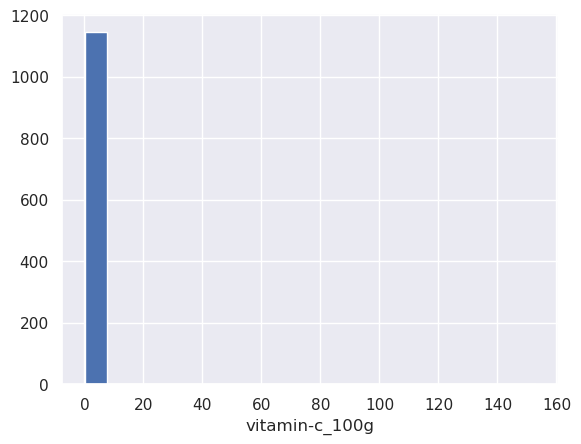

moyenne :  0.7307505081300871
médiane :  0.511
mode :  0    0.804
Name: vitamin-b1_100g, dtype: float64
min :  0.103
max :  161.0
quartiles :  [0.321, 0.804]
variance :  11.684325511940852
écart-type :  3.4182342681479354
coefficient de variation :  4.677703580247701
skewness :  36.276143831126646
kurtosis :  1473.9297408741718


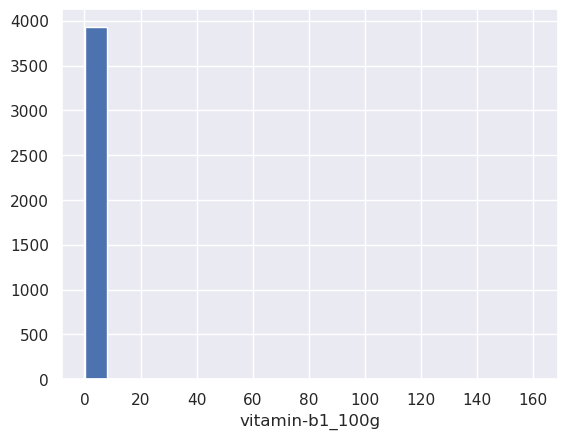

moyenne :  0.539529211390457
médiane :  0.329032
mode :  0    0.455357
Name: vitamin-b2_100g, dtype: float64
min :  0.102
max :  26.785714
quartiles :  [0.239859, 0.508426]
variance :  0.6529753962282717
écart-type :  0.8080689303693539
coefficient de variation :  1.4977297119591082
skewness :  14.980078150278903
kurtosis :  391.2661450332977


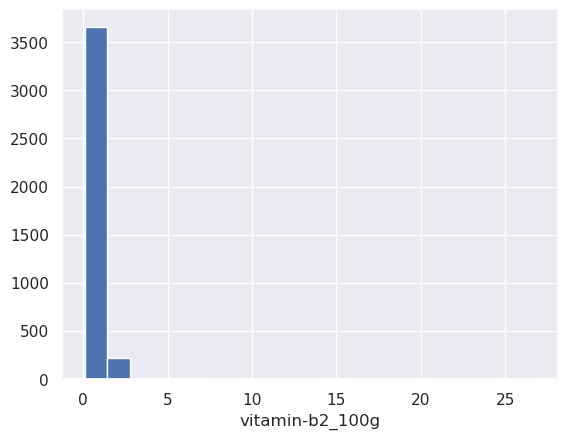

moyenne :  2.660859318181818
médiane :  0.166667
mode :  0    0.16
Name: vitamin-pp_100g, dtype: float64
min :  0.11
max :  21.428571
quartiles :  [0.16, 2.045]
variance :  29.5321839561095
écart-type :  5.434352211267641
coefficient de variation :  2.0423297744959203
skewness :  2.683721427807008
kurtosis :  6.847769001276539


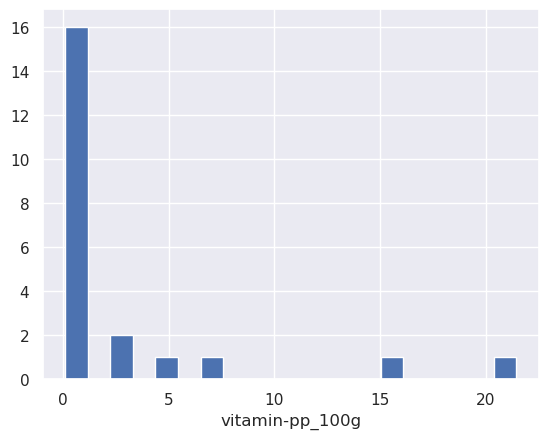

moyenne :  6.148708333333332
médiane :  1.0
mode :  0    1.2
Name: vitamin-b6_100g, dtype: float64
min :  0.2
max :  92.6
quartiles :  [0.2785, 1.2]
variance :  373.9242067065975
écart-type :  19.337119917572977
coefficient de variation :  3.1449076569045773
skewness :  4.113903699725087
kurtosis :  17.572165731972298


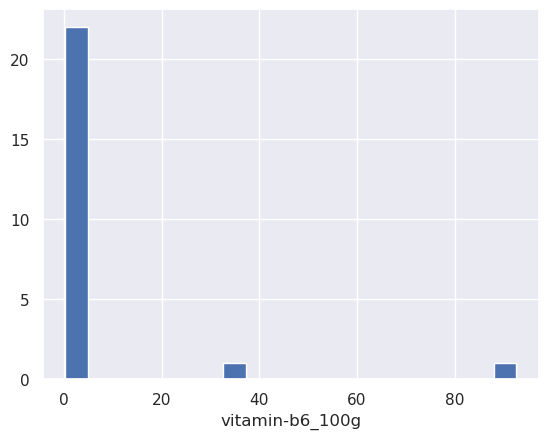

moyenne :  5.854487166666668
médiane :  2.35
mode :  0     0.500000
1     0.600000
2     0.700000
3     4.000000
4     6.250000
5    23.076923
Name: vitamin-b9_100g, dtype: float64
min :  0.5
max :  23.076923
quartiles :  [0.625, 5.6875]
variance :  63.84279253999015
écart-type :  7.9901684925907634
coefficient de variation :  1.3647939204793023
skewness :  2.087736981630402
kurtosis :  4.517320873490389


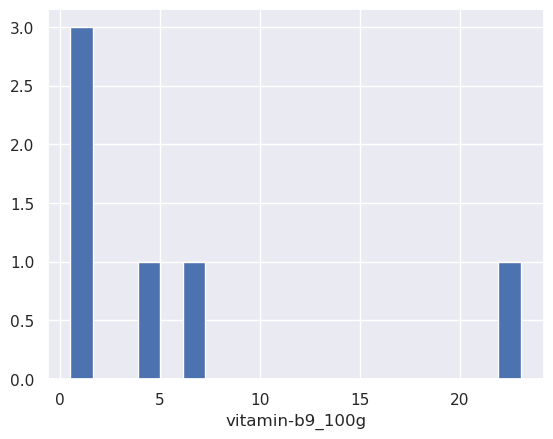

moyenne :  nan
médiane :  nan
mode :  Series([], Name: vitamin-b12_100g, dtype: float64)
min :  nan
max :  nan
quartiles :  [nan, nan]
variance :  nan
écart-type :  nan
coefficient de variation :  nan
skewness :  nan
kurtosis :  nan


/home/slerendu/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


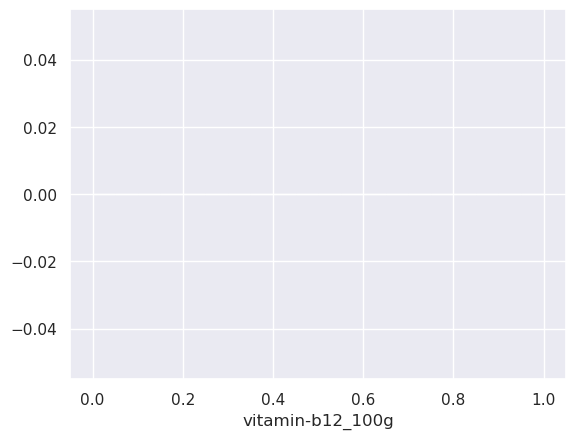

moyenne :  nan
médiane :  nan
mode :  Series([], Name: biotin_100g, dtype: float64)
min :  nan
max :  nan
quartiles :  [nan, nan]
variance :  nan
écart-type :  nan
coefficient de variation :  nan
skewness :  nan
kurtosis :  nan


/home/slerendu/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


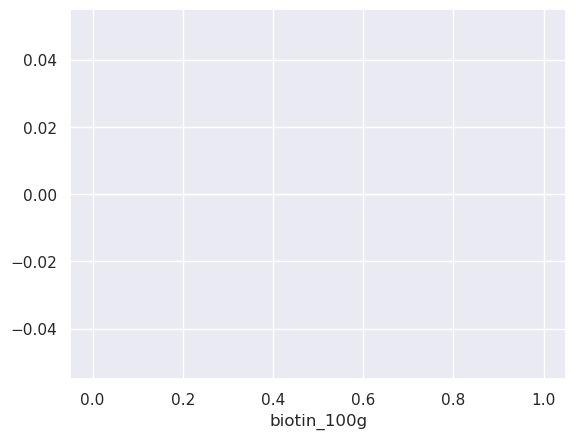

moyenne :  10.620748090909093
médiane :  0.923
mode :  0    0.125
Name: pantothenic-acid_100g, dtype: float64
min :  0.125
max :  60.0
quartiles :  [0.28550000000000003, 9.8271145]
variance :  340.54592908440014
écart-type :  18.453886557698358
coefficient de variation :  1.737531706781945
skewness :  2.10274642596363
kurtosis :  4.047902080425923


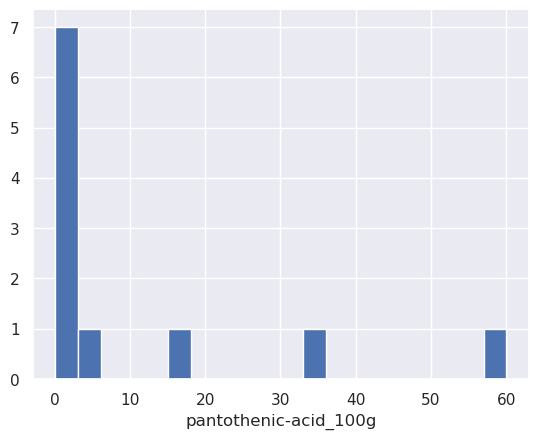

moyenne :  0.42660780828883826
médiane :  0.234
mode :  0    0.188
Name: potassium_100g, dtype: float64
min :  0.101
max :  600.0
quartiles :  [0.161, 0.446]
variance :  23.638241839178537
écart-type :  4.861917506414371
coefficient de variation :  11.396691321511327
skewness :  119.48199857708329
kurtosis :  14705.754728376625


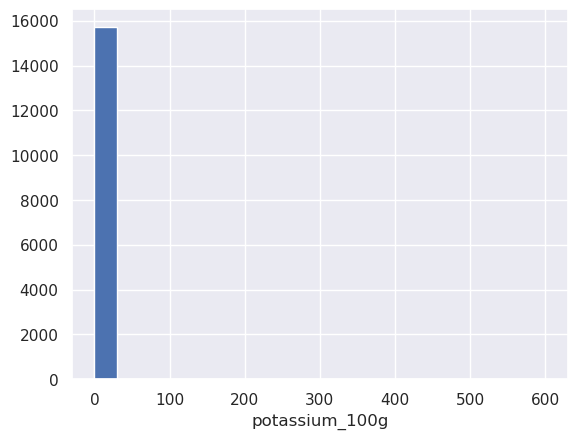

moyenne :  0.37699999999999995
médiane :  0.372
mode :  0    0.304
1    0.360
Name: chloride_100g, dtype: float64
min :  0.17
max :  0.589
quartiles :  [0.3235, 0.41000000000000003]
variance :  0.007133851851851853
écart-type :  0.08446213265038868
coefficient de variation :  0.22403748713630953
skewness :  0.3858733001650896
kurtosis :  1.0975843334487134


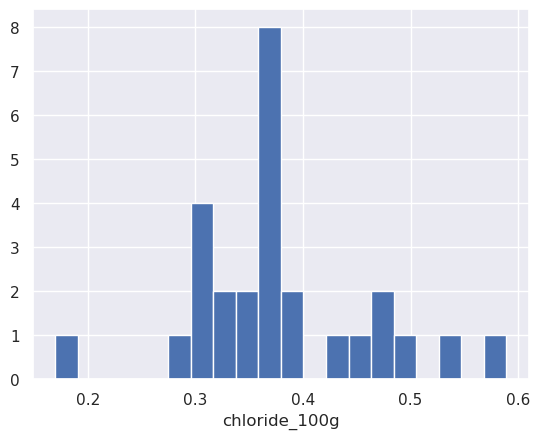

moyenne :  0.3710700906583444
médiane :  0.167
mode :  0    0.714
Name: calcium_100g, dtype: float64
min :  0.101
max :  694.737
quartiles :  [0.132, 0.35024999999999995]
variance :  30.982087129553435
écart-type :  5.566155507129983
coefficient de variation :  15.000280667338702
skewness :  105.39246294550327
kurtosis :  12068.232845934508


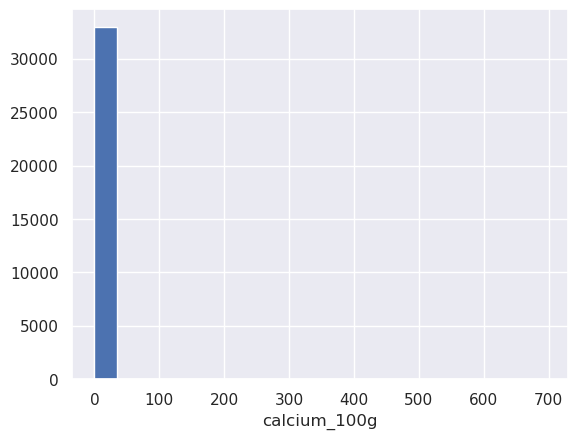

moyenne :  0.8457031319678482
médiane :  0.286
mode :  0    0.143
Name: phosphorus_100g, dtype: float64
min :  0.101
max :  559.459
quartiles :  [0.1768, 0.381]
variance :  218.22552307338034
écart-type :  14.772458261013309
coefficient de variation :  17.46766412776502
skewness :  29.810824291145234
kurtosis :  930.3074776775599


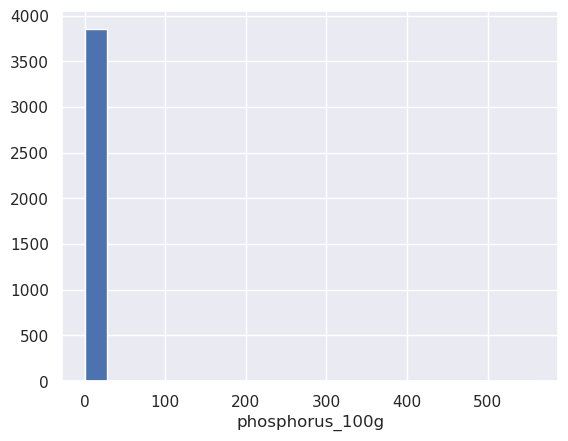

moyenne :  6.601678846153846
médiane :  2.9841249999999997
mode :  0    2.8
Name: iron_100g, dtype: float64
min :  0.1044
max :  50.0
quartiles :  [1.169645, 5.9434175]
variance :  109.98127665491019
écart-type :  10.48719584326097
coefficient de variation :  1.58856498288626
skewness :  3.116532560624236
kurtosis :  10.995334041172278


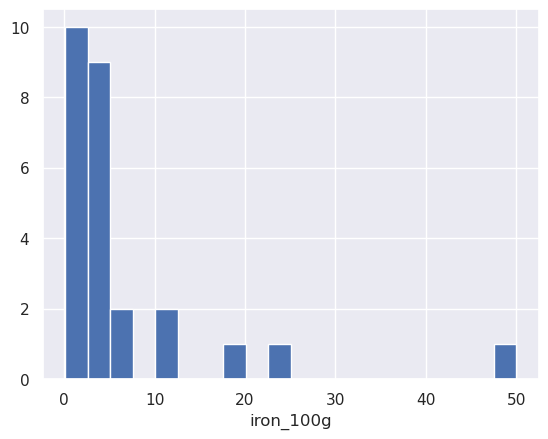

moyenne :  0.825261955034216
médiane :  0.15
mode :  0    0.143
Name: magnesium_100g, dtype: float64
min :  0.101
max :  657.143
quartiles :  [0.133, 0.233]
variance :  275.46997749411236
écart-type :  16.597288257245893
coefficient de variation :  20.111539319121718
skewness :  33.92742190251415
kurtosis :  1256.238686861374


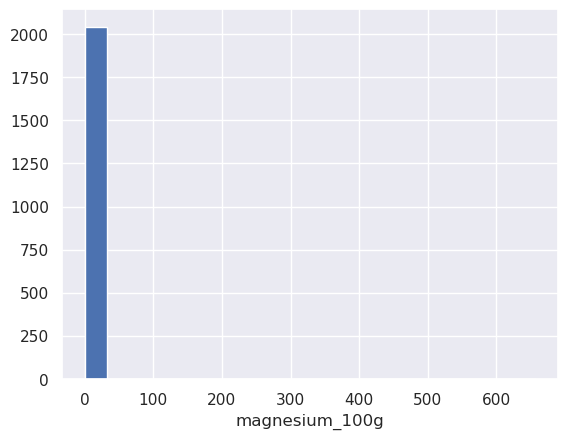

moyenne :  3.4
médiane :  3.4
mode :  0    2.8
1    4.0
Name: zinc_100g, dtype: float64
min :  2.8
max :  4.0
quartiles :  [3.0999999999999996, 3.7]
variance :  0.3600000000000001
écart-type :  0.6000000000000001
coefficient de variation :  0.17647058823529416
skewness :  nan
kurtosis :  nan


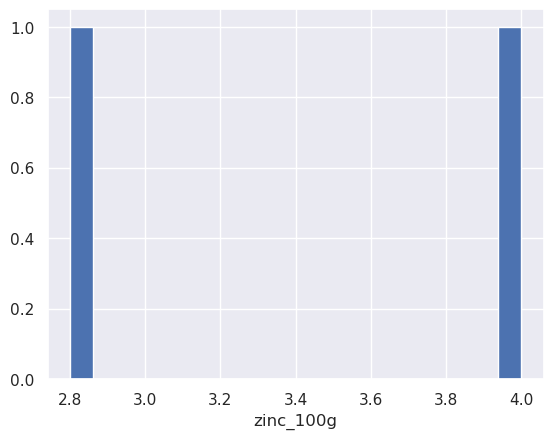

moyenne :  8.416758000000002
médiane :  8.416758000000002
mode :  0     0.350000
1    16.483516
Name: copper_100g, dtype: float64
min :  0.35
max :  16.483516
quartiles :  [4.383379, 12.450137000000002]
variance :  65.07258463056401
écart-type :  8.066758
coefficient de variation :  0.9584162928291391
skewness :  nan
kurtosis :  nan


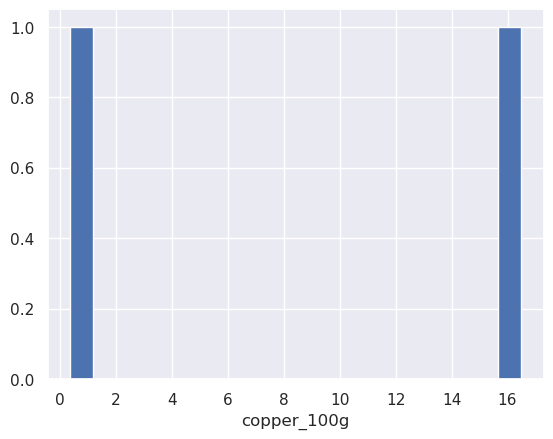

moyenne :  0.3825
médiane :  0.3335
mode :  0    0.7
Name: manganese_100g, dtype: float64
min :  0.113
max :  0.7
quartiles :  [0.16125, 0.6167499999999999]
variance :  0.05880758333333332
écart-type :  0.24250274912531058
coefficient de variation :  0.633994115360289
skewness :  0.39577763517243536
kurtosis :  -1.9255115930076263


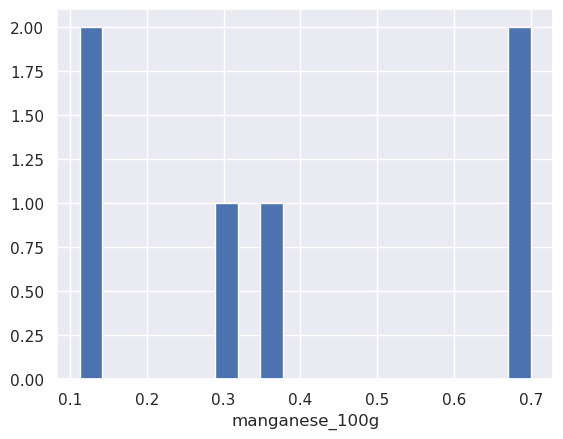

moyenne :  nan
médiane :  nan
mode :  Series([], Name: fluoride_100g, dtype: float64)
min :  nan
max :  nan
quartiles :  [nan, nan]
variance :  nan
écart-type :  nan
coefficient de variation :  nan
skewness :  nan
kurtosis :  nan


/home/slerendu/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


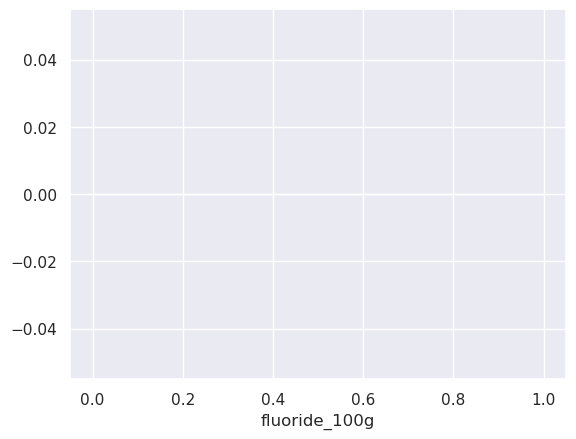

moyenne :  3.571429
médiane :  3.571429
mode :  0    3.571429
Name: selenium_100g, dtype: float64
min :  3.571429
max :  3.571429
quartiles :  [3.571429, 3.571429]
variance :  0.0
écart-type :  0.0
coefficient de variation :  0.0
skewness :  nan
kurtosis :  nan


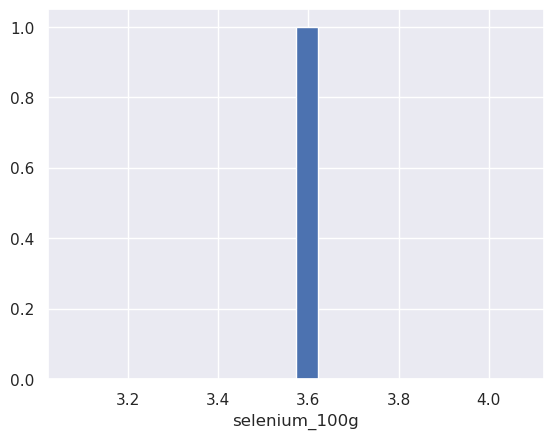

moyenne :  nan
médiane :  nan
mode :  Series([], Name: chromium_100g, dtype: float64)
min :  nan
max :  nan
quartiles :  [nan, nan]
variance :  nan
écart-type :  nan
coefficient de variation :  nan
skewness :  nan
kurtosis :  nan


/home/slerendu/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


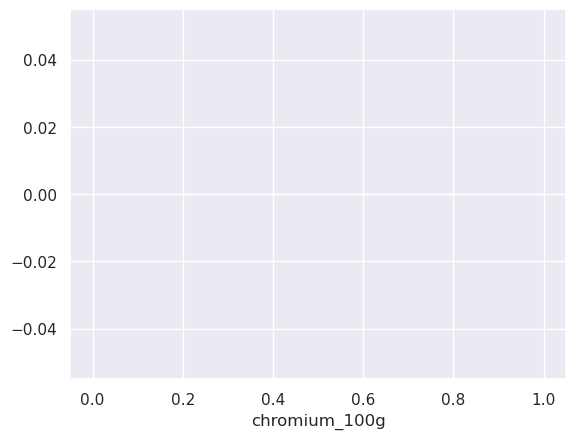

moyenne :  nan
médiane :  nan
mode :  Series([], Name: molybdenum_100g, dtype: float64)
min :  nan
max :  nan


/home/slerendu/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


quartiles :  [nan, nan]
variance :  nan
écart-type :  nan
coefficient de variation :  nan
skewness :  nan
kurtosis :  nan


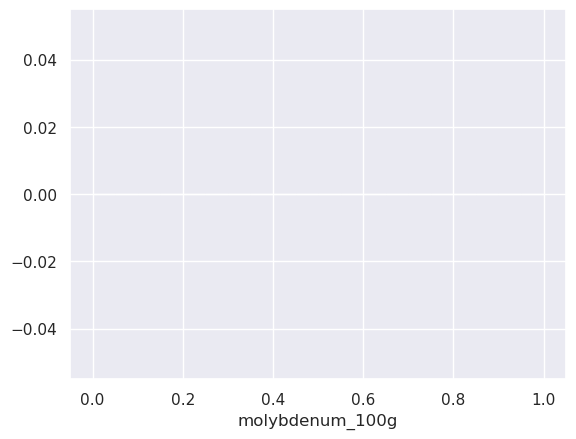

moyenne :  nan
médiane :  nan
mode :  Series([], Name: iodine_100g, dtype: float64)
min :  nan
max :  nan
quartiles :  [nan, nan]
variance :  nan
écart-type :  nan
coefficient de variation :  nan
skewness :  nan
kurtosis :  nan


/home/slerendu/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


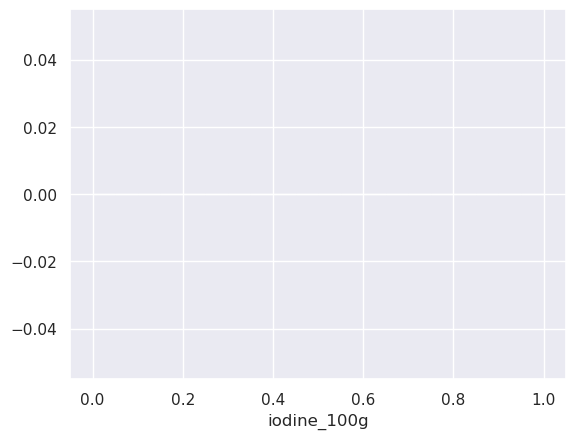

In [31]:
for col in col_vitamins + col_minerals :
    mask = data[col]>0.1
    print("moyenne : ", data.loc[mask, col].mean())
    print("médiane : ", data.loc[mask, col].median())
    print("mode : ", data.loc[mask, col].mode())
    print("min : ", data.loc[mask, col].min())
    print("max : ", data.loc[mask, col].max())
    quartiles = [np.nanpercentile(data.loc[mask, col], p) for p in [25, 75]]
    print("quartiles : ", quartiles)
    # mesures de dispersion
    print("variance : ", data.loc[mask, col].var(ddof=0))
    print("écart-type : ", data.loc[mask, col].std(ddof=0))
    print("coefficient de variation : ", data.loc[mask, col].std(ddof=0)/data.loc[mask, col].mean())
    # mesures de forme
    print("skewness : ", data.loc[mask, col].skew())
    print("kurtosis : ", data.loc[mask, col].kurtosis())
    data.loc[mask, col].hist(bins=20)
    plt.xlabel(col)
    plt.show()

Il y a 198718 produits venant des 4 principaux pays, soit 95.33 % des données.


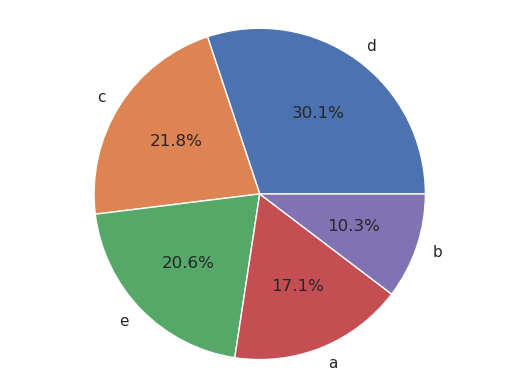

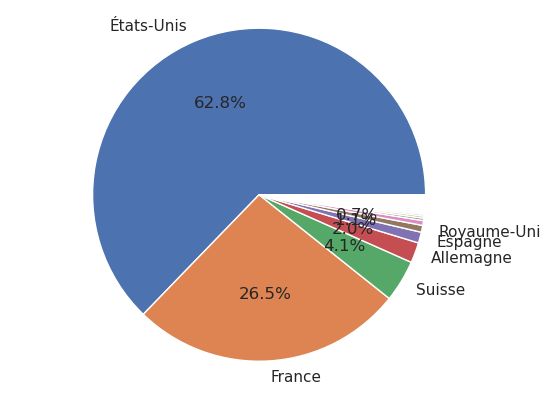

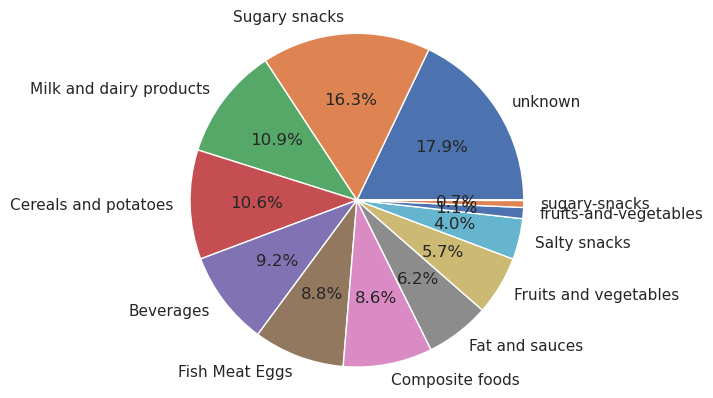

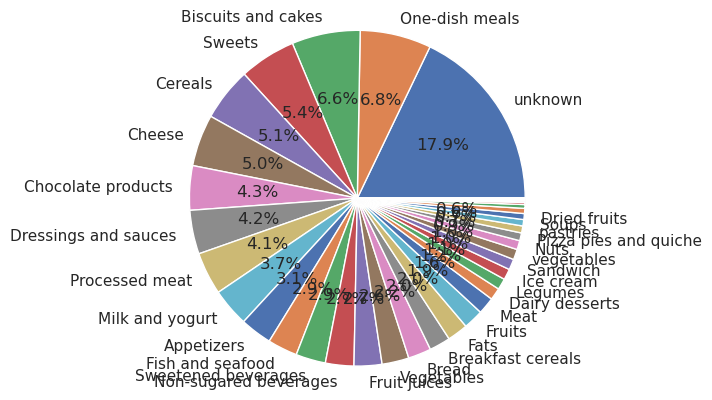

In [32]:
list_categ_pie = ["nutrition_grade_fr", "countries_fr", "pnns_groups_1", "pnns_groups_2"]
main_countries = ["France", "Allemagne", "Suisse", "États-Unis"]
nb_pays = len(data.loc[data["countries_fr"].isin(main_countries),:])
print("Il y a", nb_pays, "produits venant des 4 principaux pays, soit", round(nb_pays/len(data)*100, 2), "% des données.")
limit_perc = 0.5
# représentation graphique
for categ in list_categ_pie:
    temp_val_count = data[categ].value_counts(normalize=True)
    temp_val_count.plot(kind='pie', autopct=show_perc, labels=show_labels(temp_val_count), label='')
    plt.axis('equal')
    plt.show()